In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import seaborn as sns
import folium
from folium.plugins import HeatMap
plt.style.use('seaborn')
from IPython.display import clear_output
%matplotlib inline
color = sns.color_palette()
import plotly as py
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go

In [3]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [4]:
py.offline.init_notebook_mode(connected=True)

In [5]:
data=pd.read_csv('D:/ML/argoid/transaction_data.csv')

In [6]:
data['TransactionTime']=pd.to_datetime(data['TransactionTime'])

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning:

tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



In [7]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   UserId                  1083818 non-null  int64         
 1   TransactionId           1083818 non-null  int64         
 2   TransactionTime         1083818 non-null  datetime64[ns]
 3   ItemCode                1083818 non-null  int64         
 4   ItemDescription         1080910 non-null  object        
 5   NumberOfItemsPurchased  1083818 non-null  int64         
 6   CostPerItem             1083818 non-null  float64       
 7   Country                 1083818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 66.2+ MB


In [9]:
data.describe().round(2)

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1083818.00,1083818.00,1083818.00,1083818.00,1083818.00
mean,241016.22,6159416.64,658268.70,28.66,9.50
std,142336.43,147634.09,452631.43,654.24,2308.14
min,-1.00,5900015.00,-1.00,-242985.00,-15265.64
25%,259392.00,6026856.00,460908.00,3.00,1.73
50%,302022.00,6166611.00,475293.00,9.00,2.88
75%,341355.00,6289569.00,488943.00,30.00,5.70
max,384027.00,6397457.00,1894494.00,242985.00,1696285.44


# Data Cleaning

In [10]:
#checking missing values for each column
data.isnull().sum().sort_values(ascending=False)

ItemDescription           2908
Country                      0
CostPerItem                  0
NumberOfItemsPurchased       0
ItemCode                     0
TransactionTime              0
TransactionId                0
UserId                       0
dtype: int64

In [11]:
# change description - UPPER case to LOWER case
data['ItemDescription'] = data.ItemDescription.str.lower()

### Remove rows with missing values

In [12]:
# df_new without missing values
df_new = data.dropna()

In [13]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

Country                   0
CostPerItem               0
NumberOfItemsPurchased    0
ItemDescription           0
ItemCode                  0
TransactionTime           0
TransactionId             0
UserId                    0
dtype: int64

### Remove Quantity with negative values

In [14]:
df_new = df_new[df_new.UserId > 0]

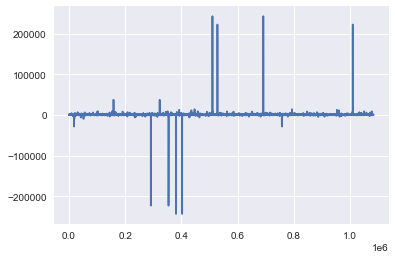

In [15]:
df_new['NumberOfItemsPurchased'].plot()

#### So we can see that we have negative values of number of items purchased . So i think that they might be items which were returned back  to the e commerce company because of any mistake by the user during transaction.Lets check it out!!!

In [16]:
df_new[(df_new['UserId']==300909) & (df_new['ItemCode']==466452)]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
69,300909,6015757,2018-05-29 14:14:00,466452,four hook white lovebirds,-3,2.9,United Kingdom
22886,300909,6015757,2018-05-29 14:14:00,466452,four hook white lovebirds,-3,2.9,United Kingdom
811435,300909,6010158,2018-05-23 08:17:00,466452,four hook white lovebirds,18,2.9,United Kingdom
1063156,300909,6010158,2018-05-23 08:17:00,466452,four hook white lovebirds,18,2.9,United Kingdom


#### So you can see that the user with userid 300909  bought 18 'four hook white lovebirds' on 23rd may and returned 3 of them on 29th.Which means my assumption is correct. So lets ignore the return backs and delete them from the data as they are of no use for company

In [17]:
df_new = df_new[df_new.NumberOfItemsPurchased > 0] #Removing negative values of number of items purchased

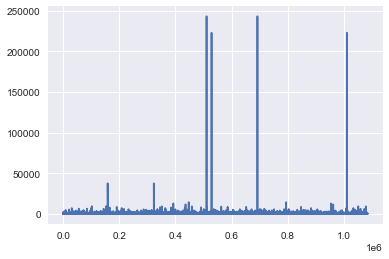

In [18]:
df_new['NumberOfItemsPurchased'].plot() #plot after deleting negative values

In [19]:
df_new.describe().round(2)

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,795848.00,795848.00,795848.00,795848.00,795848.00
mean,321180.62,6166788.39,643503.83,39.07,8.57
std,35976.54,144167.75,433761.78,541.26,2689.21
min,259266.00,5900015.00,-1.00,3.00,0.00
25%,293349.00,6041574.00,461811.00,6.00,1.73
50%,318339.00,6180823.00,475923.00,18.00,2.70
75%,352695.00,6292990.00,488607.00,36.00,5.18
max,384027.00,6397457.00,1894494.00,242985.00,1696285.44


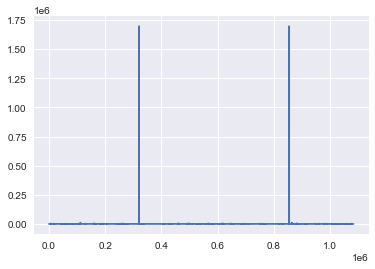

In [20]:
df_new['CostPerItem'].plot()

# Add the column - amount_spent

In [21]:
df_new['amount_spent'] = df_new['NumberOfItemsPurchased'] * df_new['CostPerItem']

# Add the columns - Month, Day and Hour for the invoice

In [22]:
df_new.insert(loc=2, column='year_month', value=df_new['TransactionTime'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.TransactionTime.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.TransactionTime.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.TransactionTime.dt.hour)

In [23]:
df_new.head()

,UserId,TransactionId,year_month,month,day,hour,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,amount_spent
0,278166,6355745,201902,2,6,12,2019-02-02 12:50:00,465549,family album white picture frame,6,11.73,United Kingdom,70.38
1,337701,6283376,201812,12,3,9,2018-12-26 09:06:00,482370,london bus coffee mug,3,3.52,United Kingdom,10.56
2,267099,6385599,201902,2,5,9,2019-02-15 09:45:00,490728,set 12 colour pencils dolly girl,72,0.90,France,64.80
3,380478,6044973,201806,6,5,7,2018-06-22 07:14:00,459186,union jack flag luggage tag,3,1.73,United Kingdom,5.19
5,285957,6307136,201901,1,5,9,2019-01-11 09:50:00,1787247,cut glass t-light holder octagon,12,3.52,United Kingdom,42.24


# Exploratory Data Analysis (EDA)

## How many orders made by the customers?

In [24]:
df_new.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count().head()

,UserId,Country,TransactionId
0,259266,United Kingdom,2
1,259287,Iceland,364
2,259308,Finland,62
3,259329,Italy,146
4,259350,Norway,34


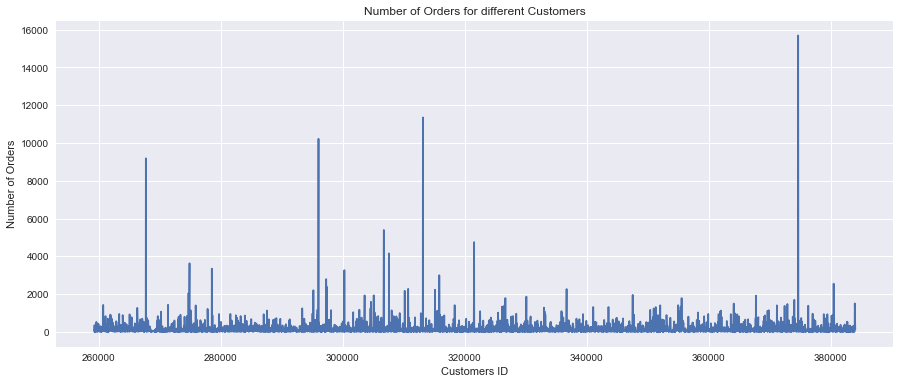

In [25]:
orders = df_new.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.UserId, orders.TransactionId)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Check TOP 5 most number of orders

In [26]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='TransactionId', ascending=False).head()

The TOP 5 customers with most number of orders...


,UserId,Country,TransactionId
4019,374661,United Kingdom,15694
1888,313131,EIRE,11354
1298,296016,United Kingdom,10222
334,267708,United Kingdom,9192
1670,306726,United Kingdom,5400


### How much money spent by the customers?

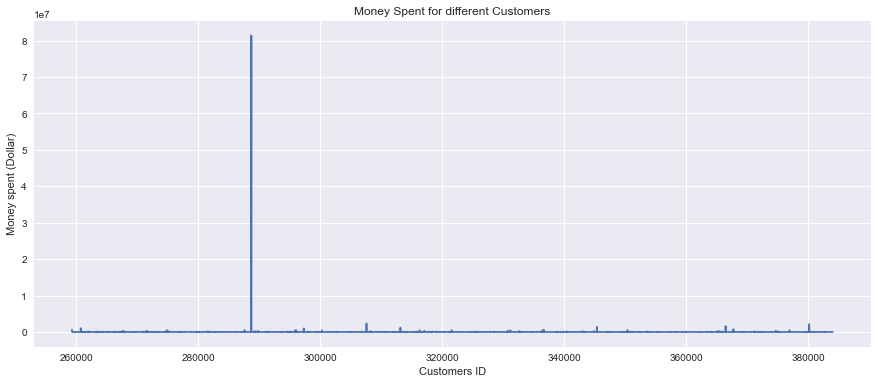

In [27]:
money_spent = df_new.groupby(by=['UserId','Country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.UserId, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [28]:
money_spent[money_spent['amount_spent']==max(money_spent['amount_spent'])]

,UserId,Country,amount_spent
1046,288687,United Kingdom,81421701.12


#### A guy from UK spent the max amount . So lets remove and him observe the plot

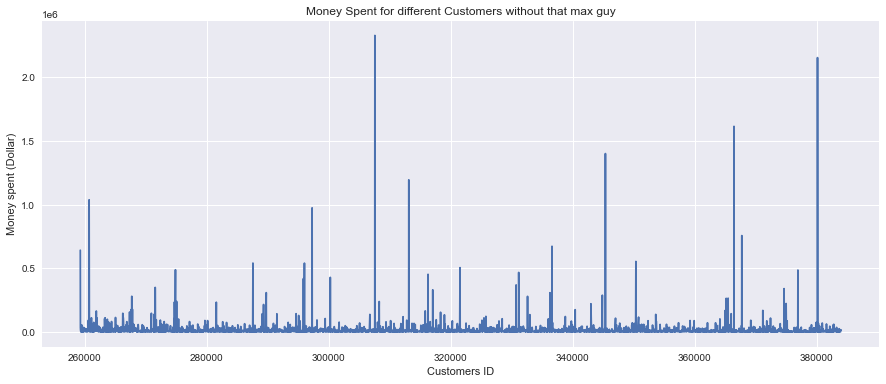

In [29]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.drop([1046]).UserId, money_spent.drop([1046]).amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers without that max guy')
plt.show()

### Check TOP 5 highest money spent

In [30]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,UserId,Country,amount_spent
1046,288687,United Kingdom,81421701.12
1698,307566,Netherlands,2326430.94
4210,380142,United Kingdom,2152388.16
3737,366450,United Kingdom,1613145.84
3017,345366,United Kingdom,1399617.66


#  Number of Orders

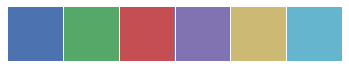

In [31]:
# color available
sns.palplot(color)

In [32]:
df_new.head(4)

,UserId,TransactionId,year_month,month,day,hour,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,amount_spent
0,278166,6355745,201902,2,6,12,2019-02-02 12:50:00,465549,family album white picture frame,6,11.73,United Kingdom,70.38
1,337701,6283376,201812,12,3,9,2018-12-26 09:06:00,482370,london bus coffee mug,3,3.52,United Kingdom,10.56
2,267099,6385599,201902,2,5,9,2019-02-15 09:45:00,490728,set 12 colour pencils dolly girl,72,0.90,France,64.80
3,380478,6044973,201806,6,5,7,2018-06-22 07:14:00,459186,union jack flag luggage tag,3,1.73,United Kingdom,5.19


In [33]:
max(df_new.TransactionTime)

Timestamp('2028-02-18 13:19:00')

In [34]:
min(df_new.TransactionTime)

Timestamp('2018-02-12 04:26:00')

In [35]:
df_new=df_new[df_new.year_month!=202802]  #Removing year 2028

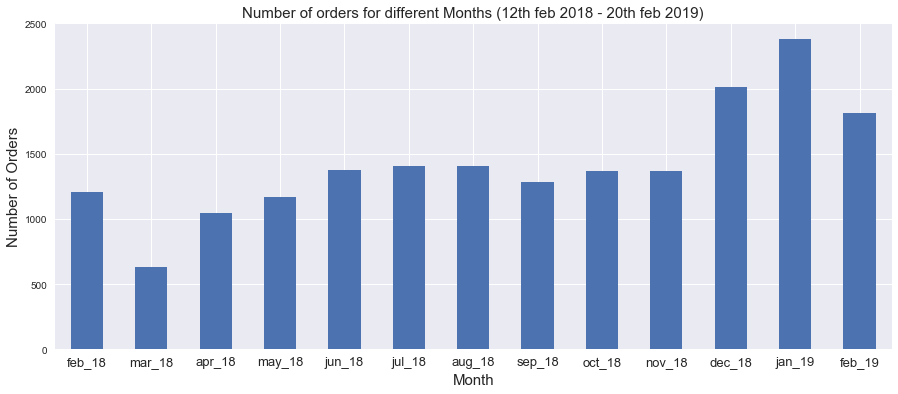

In [36]:
ax =df_new.groupby('year_month')['TransactionId'].unique().apply(lambda x: len(x)).plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (12th feb 2018 - 20th feb 2019)',fontsize=15)
ax.set_xticklabels(('feb_18','mar_18','apr_18','may_18','jun_18','jul_18','aug_18','sep_18','oct_18','nov_18','dec_18','jan_19','feb_19'), rotation='horizontal', fontsize=13)
plt.show()

#### So you can observe that number of orders are increasing from november till january may be because of Christmas and new year eve.

# How many orders (per day)?

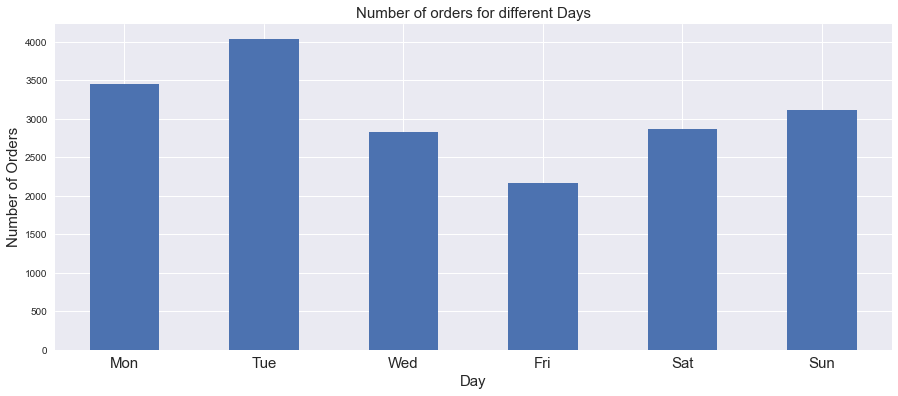

In [37]:
ax = df_new.groupby('day')['TransactionId'].unique().apply(lambda x : len(x)).plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

#### So you can see that most number of orders are being made on Tuesday

# How many orders (per hour)?

In [38]:
df_new.groupby('hour')['TransactionId'].unique().apply(lambda x:len(x))

hour
2        1
3       29
4      555
5     1387
6     2215
7     2269
8     3122
9     2624
10    2268
11    2027
12    1096
13     542
14     169
15     144
16      18
Name: TransactionId, dtype: int64

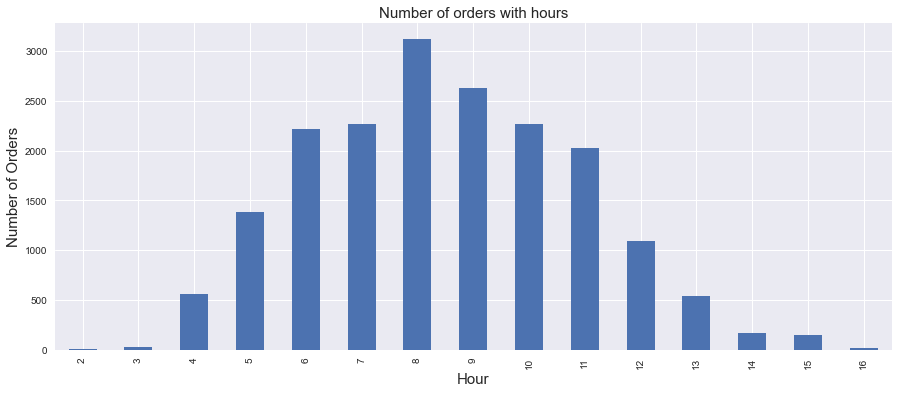

In [39]:
ax = df_new.groupby('hour')['TransactionId'].unique().apply(lambda x:len(x)).plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders with hours',fontsize=15)
#ax.set_xticklabels(('Mon','Tue','Wed','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

#### Max orders are made in 8th hour

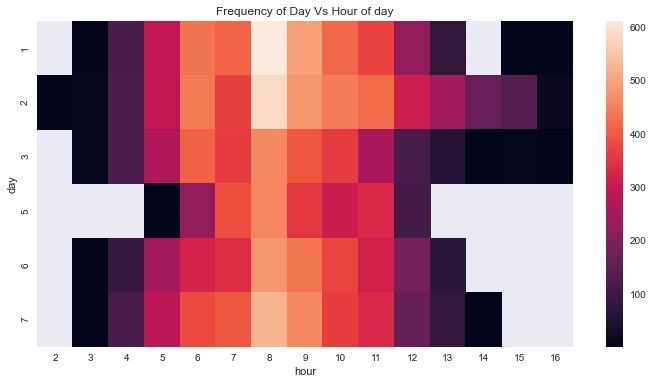

In [40]:
grouped_df  = df_new.groupby(["day", "hour"])["TransactionId"].unique().reset_index()
grouped_df["TransactionId"] = grouped_df["TransactionId"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('day', 'hour', 'TransactionId')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

#### So you can see on day 1 and 2 (i.e monday and tuesday), max orders are made in 8th hour and on friday , saturday and sundays , max orders are placed from 14th hour

# CostPerItem

In [41]:
df_new.CostPerItem.describe()

count    7.936280e+05
mean     8.579725e+00
std      2.692973e+03
min      0.000000e+00
25%      1.730000e+00
50%      2.700000e+00
75%      5.180000e+00
max      1.696285e+06
Name: CostPerItem, dtype: float64

#### So there are some items whose cost is zero. These might be the items which were given to users as free such as manuals etc or some gift to their regular customers or something of that kind

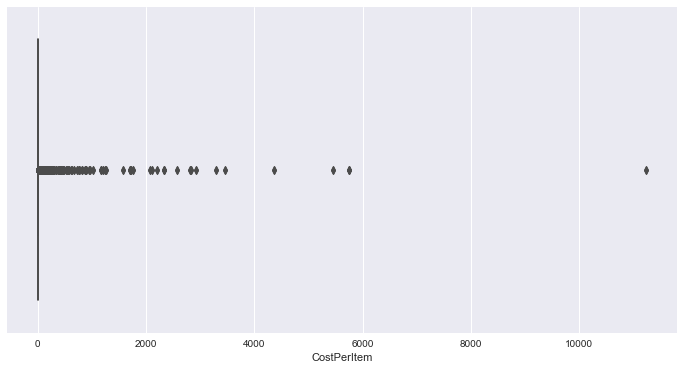

In [42]:
# check the distribution of unit price removing the max value as it is a outlier.
plt.subplots(figsize=(12,6))
sns.boxplot(df_new[df_new['CostPerItem']!=max(df_new['CostPerItem'])].CostPerItem)
plt.show()

In [43]:
df_free = df_new[df_new.CostPerItem == 0]

In [44]:
df_free.head()

,UserId,TransactionId,year_month,month,day,hour,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,amount_spent
4808,261177,6316772,201901,1,2,9,2019-01-15 09:24:00,-1,manual,3,0.0,France,0.0
5544,274701,6331369,201901,1,2,7,2019-01-22 07:49:00,463869,paper bunting vintage paisley,72,0.0,United Kingdom,0.0
5623,307566,6211161,201811,11,3,10,2018-11-07 10:19:00,457506,polkadot rain hat,432,0.0,Netherlands,0.0
40452,302610,6037581,201806,6,6,10,2018-06-16 10:42:00,465402,heart garland rustic padded,6,0.0,United Kingdom,0.0
42133,261366,6281385,201812,12,2,8,2018-12-25 08:50:00,-1,manual,3,0.0,RSA,0.0


In [45]:
df_free.year_month.value_counts().sort_index()

201802     4
201803     8
201804     2
201806     8
201807     2
201808     2
201810     8
201811     8
201812     8
201901    26
201902     4
Name: year_month, dtype: int64

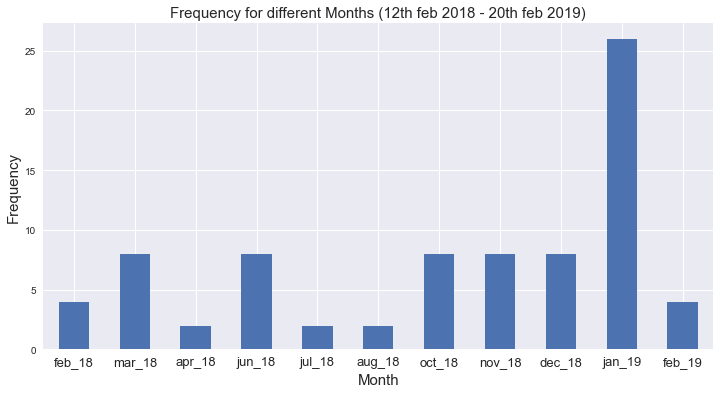

In [46]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (12th feb 2018 - 20th feb 2019)',fontsize=15)
ax.set_xticklabels(('feb_18','mar_18','apr_18','jun_18','jul_18','aug_18','oct_18','nov_18','dec_18','jan_19','feb_19'), rotation='horizontal', fontsize=13)
plt.show()

#### So you can observe that max free items have been given in jan 2019, maybe due to the new year occasion.And also there were no free items given in may 2018 and sep 2018 

#  Country

### How many orders for each country?

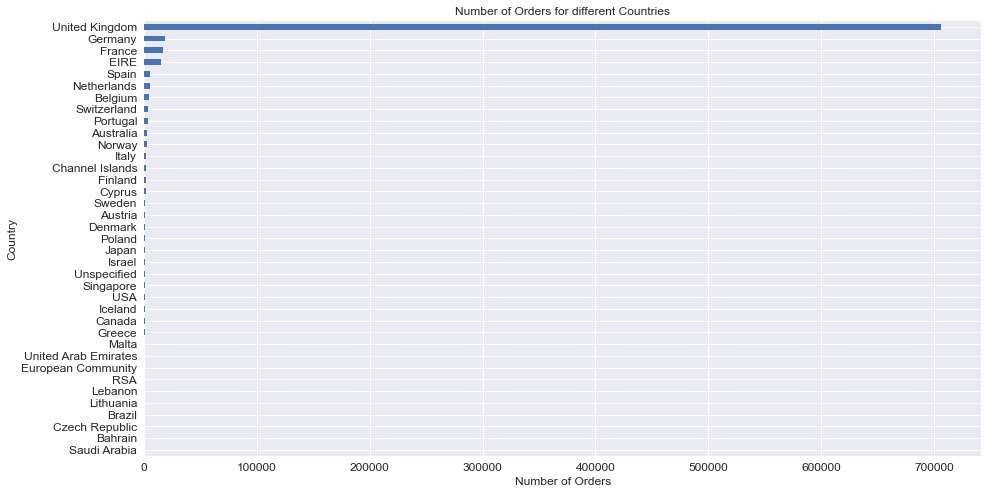

In [47]:
group_country_orders = df_new.groupby('Country')['TransactionId'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

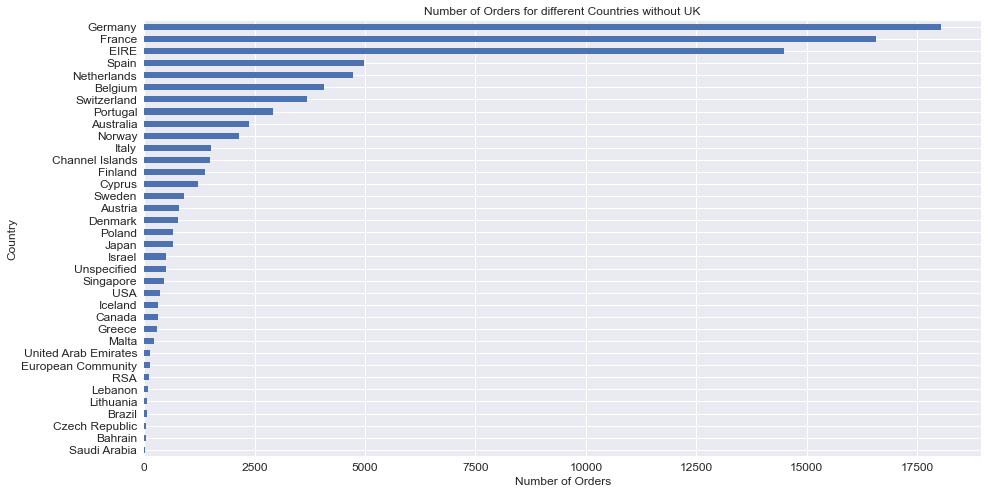

In [48]:
group_country_orders = df_new.groupby('Country')['TransactionId'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries without UK', fontsize=12)
plt.show()

#### So the top 5 countries with max orders are Uk, Germany, France, EIRE, Spain

## How much money spent by each country?

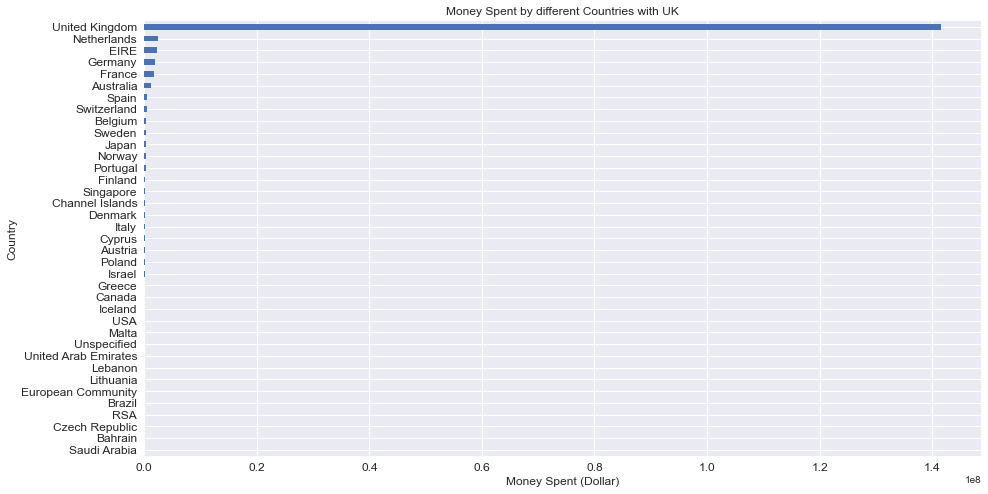

In [49]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries with UK', fontsize=12)
plt.show()

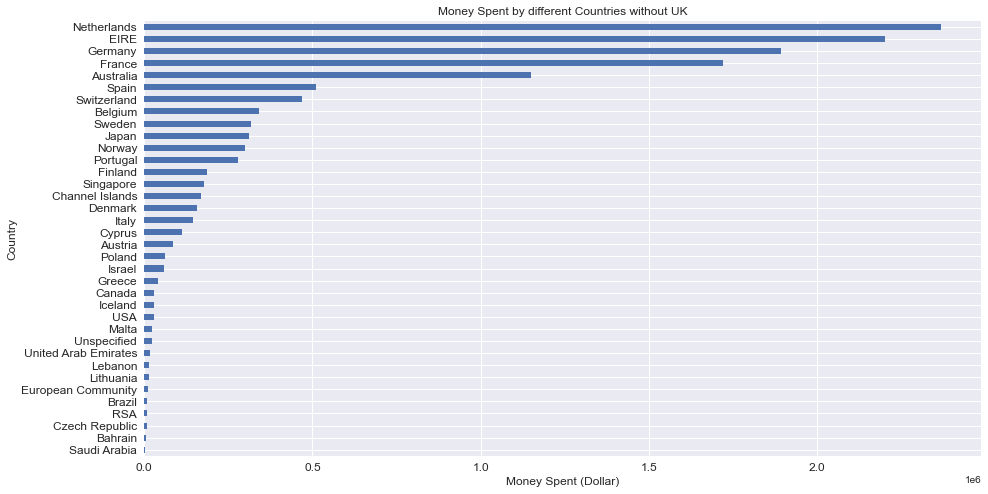

In [50]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries without UK', fontsize=12)
plt.show()

#### So the top 5 countries  which spent the max amount are Uk, Netherlands, EIRE, Germany, France

# Order Frequency by Country (Create Choropleth Map using Plotly)

In [51]:
con = df_new.groupby('Country')['TransactionId'].count().to_frame().reset_index().rename(columns={'TransactionId':'Total_Orders'})
con=con.drop([36]) 
con

,Country,Total_Orders
0,Australia,2370
1,Austria,796
2,Bahrain,34
3,Belgium,4062
4,Brazil,64
5,Canada,302
6,Channel Islands,1496
7,Cyprus,1228
8,Czech Republic,50
9,Denmark,760


In [52]:
init_notebook_mode(connected=True)

In [53]:
data1 = dict(type='choropleth',
locations = con['Country'],
locationmode = 'country names', z = con['Total_Orders'],
text = con['Country'], colorbar = {'title':'Total Orders'},
colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]], reversescale = True,
            marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ))

In [54]:
layout = dict(title='Order Frequency by Country',
geo = dict(showframe=False,projection={'type':'equirectangular'}))

In [55]:
choromap = go.Figure(data = [data1],layout = layout)
iplot(choromap,validate=False)

# Which country's customers had highest average spending per order
### And the ans is NETHERLANDS

In [56]:
pri = round(df_new.groupby('Country')['amount_spent'].sum(),2).to_frame().reset_index()

con_pri = pd.merge(con, pri, how='left', on='Country')

In [57]:
con_pri['Average_Price'] = round(con_pri['amount_spent']/con_pri['Total_Orders'],2)

In [58]:
con_pri.sort_values(by=['Average_Price'], ascending=False)

,Country,Total_Orders,amount_spent,Average_Price
23,Netherlands,4726,2.369917e+06,501.46
0,Australia,2370,1.149582e+06,485.06
19,Japan,642,3.106034e+05,483.81
29,Singapore,444,1.763522e+05,397.19
31,Sweden,902,3.186497e+05,353.27
9,Denmark,760,1.571898e+05,206.83
35,United Kingdom,706688,1.416429e+08,200.43
21,Lithuania,70,1.376868e+04,196.70
20,Lebanon,90,1.403838e+04,155.98
10,EIRE,14476,2.203039e+06,152.19


### So based on all the analysis done, I suggest that the company should target customers belonging to UK(obviously), Netherlands, Germany, Australia, EIRE, Spain, France in the months of November, December, January. 